# Telco Churn Analysis and Prediction

## Project Goal

- Identify drivers of customer **churn**
- Create machine learning model to **make predictions** on which customers are at rick of churn
- Provide **recommendations** to help TelcoCo reduce churn rate, increase customer retention, generate higher revenue.

## Project Description

**Customer churn** is one of the most important metrics for a growing business to evaluate. It's easier to save an existing customer before they leave than to convice them to come back. Understanding and preventing customer churn is critial to company's **long-term success**.

In this project, we will use statistical testing to analyze the key factors of customers who are more likely to churn, develop a classification model to predict churn based on those factors, and provide recommendations for retaining customers as well as predictions of churn for a list of customers (delivered via csv).

## Initial Questions

- Which variables are associated with churn?
- Are average monthly charges higher for customers who churn?
- Are tenure shorter for customer who churn?
- Are additional services independent with churn?

## Data Dictionary


| **Variable**         | **Value**                                                                 | **Meaning**                                                                  |
|----------------------|---------------------------------------------------------------------------|------------------------------------------------------------------------------|
| `customerID`         | Unique identifier                                                         | A unique ID assigned to each customer                                        |
| `gender`             | 1) Male 2) Female                                                         | The customer's gender                                                        |
| `SeniorCitizen`      | 0 or 1                                                                    | Indicates if the customer is a senior citizen (1) or not (0)                 |
| `Partner`            | Yes or No                                                                 | Indicates if the customer has a partner                                      |
| `Dependents`         | Yes or No                                                                 | Indicates if the customer has dependents                                     |
| `tenure`             | Integer (0-72)                                                            | This shows how long (in months) the customer has stayed with the company     |
| `PhoneService`       | Yes or No                                                                 | Indicates if the customer has a phone service                                |
| `MultipleLines`      | 1) Yes 2) No 3) No phone service                                           | Indicates if the customer has multiple phone lines                           |
| `InternetService`    | 1) DSL 2) Fiber optic 3) No internet service                              | Indicates the type of internet service the customer has                      |
| `OnlineSecurity`     | 1) Yes 2) No 3) No internet service                                       | Indicates if the customer has online security service                        |
| `OnlineBackup`       | 1) Yes 2) No 3) No internet service                                       | Indicates if the customer has online backup service                          |
| `DeviceProtection`   | 1) Yes 2) No 3) No internet service                                       | Indicates if the customer has device protection service                      |
| `TechSupport`        | 1) Yes 2) No 3) No internet service                                       | Indicates if the customer has tech support service                           |
| `StreamingTV`        | 1) Yes 2) No 3) No internet service                                       | Indicates if the customer has streaming TV service                           |
| `StreamingMovies`    | 1) Yes 2) No 3) No internet service                                       | Indicates if the customer has streaming movies service                       |
| `Contract`           | 1) Month-to-month 2) One year 3) Two year                                 | Indicates the type of contract the customer has                              |
| `PaperlessBilling`   | Yes or No                                                                 | Indicates if the customer is using paperless billing                         |
| `PaymentMethod`      | 1) Bank transfer 2) Credit card 3) Electronic check 4) Mailed check        | Indicates the method the customer uses to pay for the service                |
| `MonthlyCharges`     | Float                                                                     | Indicates the amount the customer is charged each month                      |
| `TotalCharges`       | Float                                                                     | Total amount charged to the customer                                         |
| `Churn`              | Yes or No                                                                 | Indicates if the customer has churned (left the service)                     |


## Wrangle Telco Data

### 1. Data Acquisition 

Get the data from Telco Kaggle [Link](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Telco-customer-churn.csv')

In [36]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
# Checking the shape of the dataframe
df.shape

(7043, 21)

In [38]:
# Display basic information about the dataset
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 2. Data Preparation - Data Cleaning

In [151]:
# Drop null values stored as whitespace    
df['TotalCharges'] = df['TotalCharges'].str.strip()
df = df[df.TotalCharges != '']

# Convert to correct datatype
df['TotalCharges'] = df.TotalCharges.astype(float)

In [152]:
df.duplicated().sum()

0

In [153]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [81]:
# Converting 'Churn' to binary (1 for Yes, 0 for No)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# 3. Exploratory Data Analysis

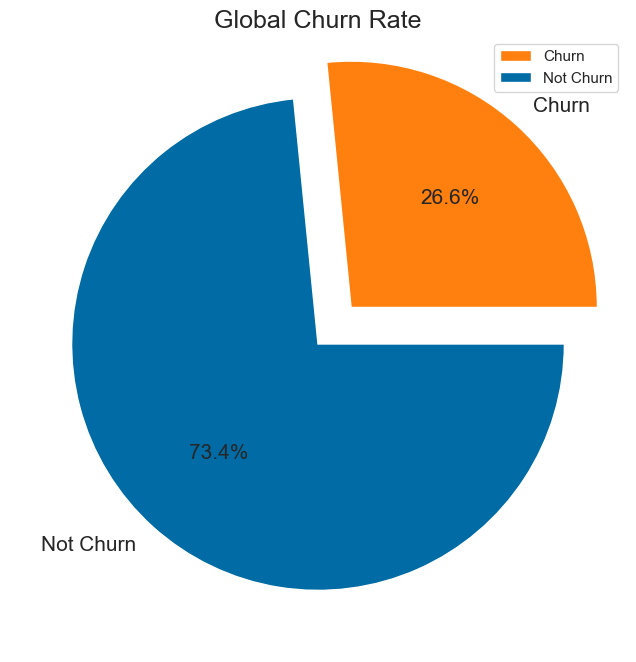

In [191]:
# Calculating global churn
churn_count = df.Churn.value_counts()
churn_count

# Visualizing the churn rate
y = np.array([churn_count[1], churn_count[0]])
plt.figure(figsize=(10,8))
mylabels = ["Churn", "Not Churn"]
myexplode = [0.2, 0]
mycolors = ['#ff800e', '#006ba4']
textprops = {"fontsize":15}
plt.pie(y, labels = mylabels, explode = myexplode, colors = mycolors, textprops=textprops, autopct='%.1f%%')
plt.legend()
plt.title('Global Churn Rate',fontsize=18)
plt.show() 

# Hypothesis 1: Which categorical variables are associated with churn?
### Statistical Test:
Chi-square test is suitable for checking associations between categorical variables and churn.

In [90]:
from scipy.stats import chi2_contingency

# Chi-square test for categorical variables
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
                       'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                       'PaperlessBilling', 'PaymentMethod']

for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f'{col}: p-value = {p:.4f}')

gender: p-value = 0.4905
SeniorCitizen: p-value = 0.0000
Partner: p-value = 0.0000
Dependents: p-value = 0.0000
PhoneService: p-value = 0.3499
MultipleLines: p-value = 0.0036
InternetService: p-value = 0.0000
OnlineSecurity: p-value = 0.0000
DeviceProtection: p-value = 0.0000
TechSupport: p-value = 0.0000
StreamingTV: p-value = 0.0000
StreamingMovies: p-value = 0.0000
Contract: p-value = 0.0000
PaperlessBilling: p-value = 0.0000
PaymentMethod: p-value = 0.0000


### Interpretation: 
- If the p-value is less than 0.05, the categorical variable is significantly associated with churn.

Looks like most of them are associated with churn

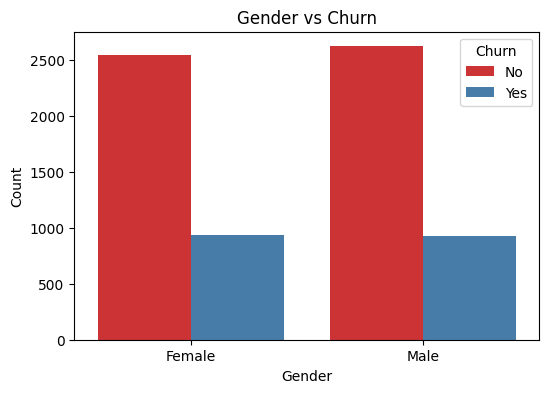

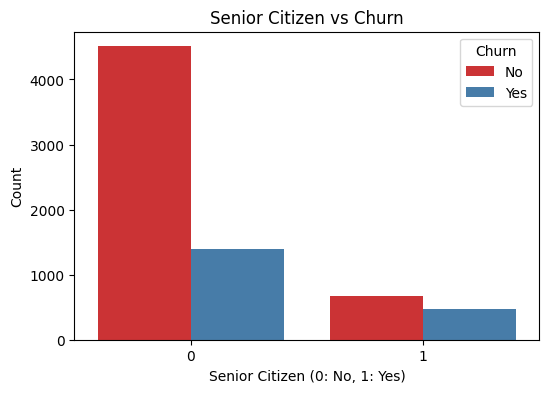

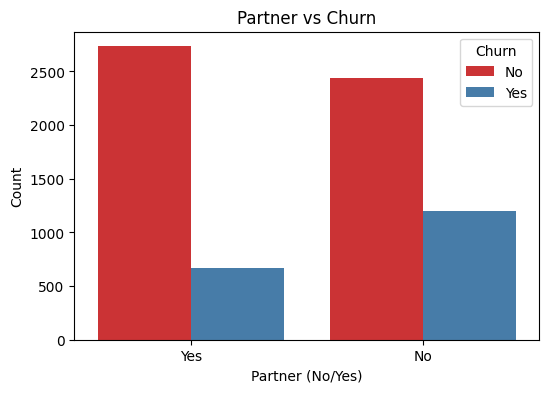

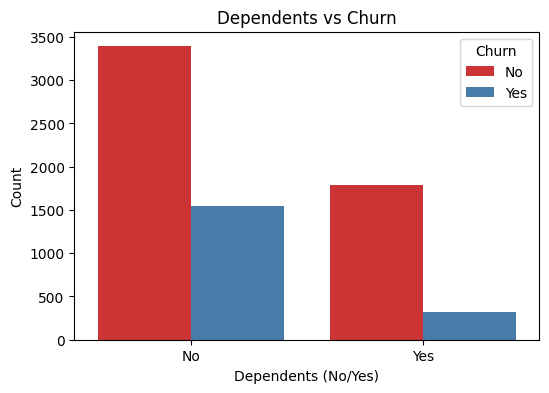

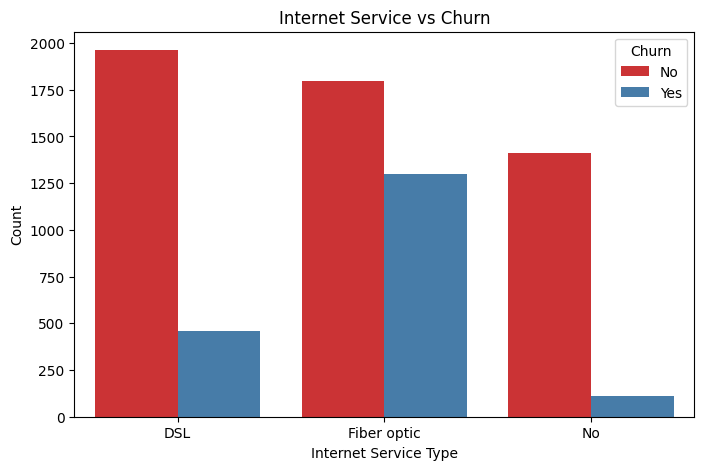

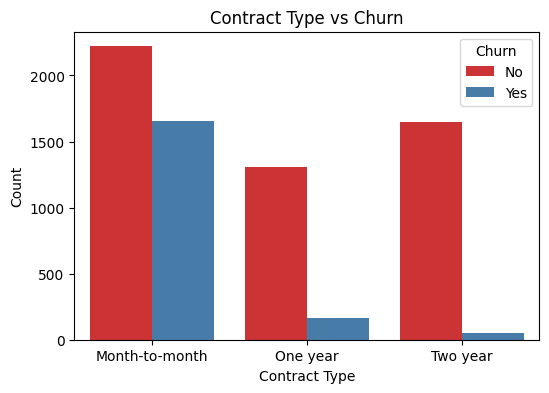

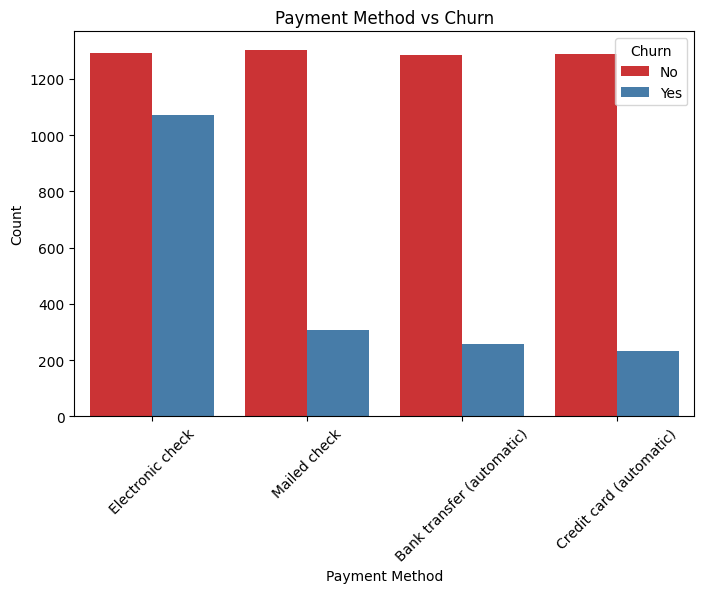

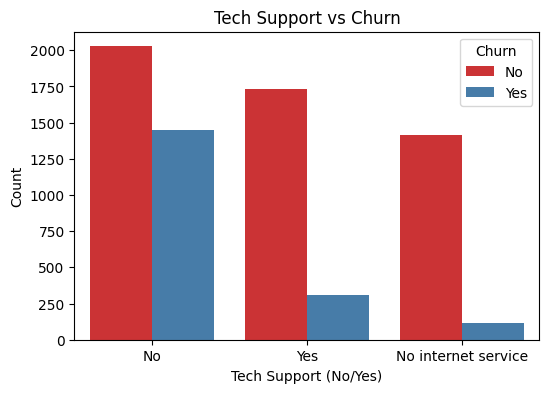

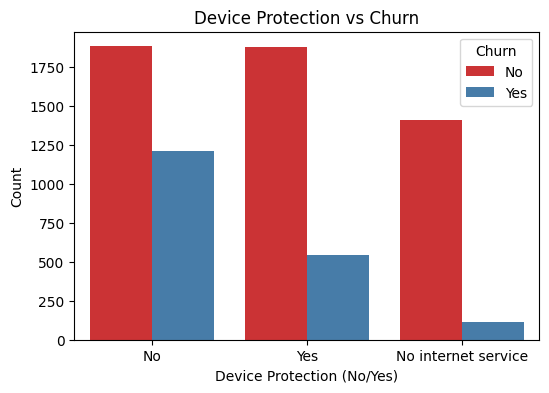

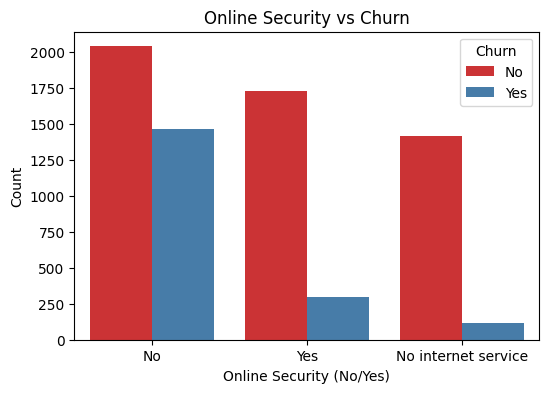

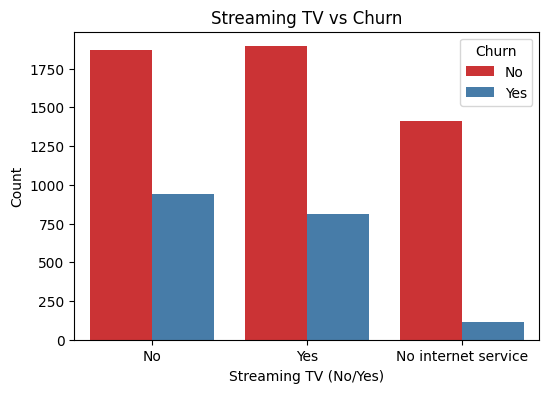

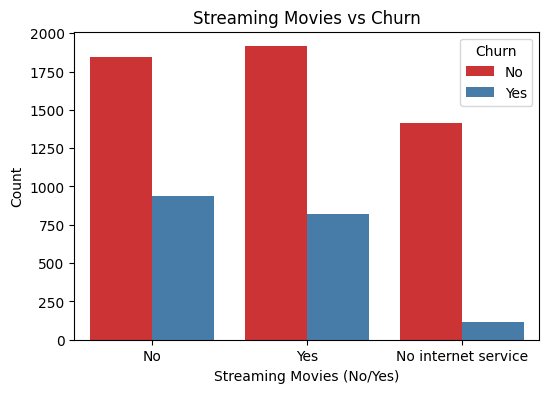

In [23]:
# Convert the Churn column to numerical values (if needed)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Bar Plots for Various Categorical Variables vs Churn

# Gender vs Churn

plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='Churn', data=df, palette='Set1')
plt.title('Gender vs Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# Senior Citizen vs Churn

plt.figure(figsize=(6, 4))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='Set1')
plt.title('Senior Citizen vs Churn')
plt.xlabel('Senior Citizen (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

#Partner vs Churn

plt.figure(figsize=(6, 4))
sns.countplot(x='Partner', hue='Churn', data=df, palette='Set1')
plt.title('Partner vs Churn')
plt.xlabel('Partner (No/Yes)')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# Dependents vs Churn

plt.figure(figsize=(6, 4))
sns.countplot(x='Dependents', hue='Churn', data=df, palette='Set1')
plt.title('Dependents vs Churn')
plt.xlabel('Dependents (No/Yes)')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# Internet Service vs Churn

plt.figure(figsize=(8, 5))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='Set1')
plt.title('Internet Service vs Churn')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# Contract Type vs Churn

plt.figure(figsize=(6, 4))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set1')
plt.title('Contract Type vs Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# Payment Method vs Churn

plt.figure(figsize=(8, 5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='Set1')
plt.title('Payment Method vs Churn')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

# Tech Support vs Churn
 
plt.figure(figsize=(6, 4))
sns.countplot(x='TechSupport', hue='Churn', data=df, palette='Set1')
plt.title('Tech Support vs Churn')
plt.xlabel('Tech Support (No/Yes)')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# Device Protection vs Churn

plt.figure(figsize=(6, 4))
sns.countplot(x='DeviceProtection', hue='Churn', data=df, palette='Set1')
plt.title('Device Protection vs Churn')
plt.xlabel('Device Protection (No/Yes)')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# Online Security vs Churn

plt.figure(figsize=(6, 4))
sns.countplot(x='OnlineSecurity', hue='Churn', data=df, palette='Set1')
plt.title('Online Security vs Churn')
plt.xlabel('Online Security (No/Yes)')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# Streaming TV vs Churn

plt.figure(figsize=(6, 4))
sns.countplot(x='StreamingTV', hue='Churn', data=df, palette='Set1')
plt.title('Streaming TV vs Churn')
plt.xlabel('Streaming TV (No/Yes)')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# Streaming Movies vs Churn

plt.figure(figsize=(6, 4))
sns.countplot(x='StreamingMovies', hue='Churn', data=df, palette='Set1')
plt.title('Streaming Movies vs Churn')
plt.xlabel('Streaming Movies (No/Yes)')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

## Insights from Graphs

### Payment Method: Electronic Check

Observation: Customers using the electronic check payment method have a higher churn rate compared to other payment methods.

Insight: This may indicate dissatisfaction with the electronic payment process or issues related to payment reliability.

### Contract Type: Month-to-Month

Observation: Customers with a month-to-month contract exhibit a significantly higher churn rate.

Insight: Short-term contracts may suggest a lack of commitment or loyalty from customers, making them more prone to churn.

### Internet Service: Fiber Optic

Observation: Customers who use fiber optic internet service show a higher churn rate than those with other internet service types.

Insight: This could indicate issues with service delivery, pricing, or competition within the market for fiber optic services.

### Partner Status: No Partner

Observation: Customers without a partner have a higher tendency to churn.

Insight: Single individuals may have different consumption patterns or needs that the service does not meet, leading to higher churn rates.

### Gender: Male vs. Female

Observation: The churn rates for male and female customers appear to be roughly equal.

Insight: This suggests that gender does not significantly impact churn behavior in this dataset.

### Dependent Status: No Dependents

Observation: Customers without dependents show a higher churn rate compared to those with dependents.

Insight: Without dependents, customers may have fewer commitments to maintaining services, leading to a higher likelihood of switching providers.

### Tech Support: No Tech Support

Observation: Customers who do not use tech support have a higher churn rate.

Insight: This may indicate that customers who require assistance or have technical issues are not receiving the support they need, prompting them to leave.

### Device Protection: No Device Protection

Observation: Customers without device protection services exhibit higher churn rates.

Insight: This could reflect customers' perceptions of the value of such services or dissatisfaction with coverage, leading them to discontinue their subscriptions.

### Online Security: No Online Security

Observation: Customers without online security services have a higher churn rate.

Insight: This suggests that customers who feel unprotected online may be more likely to leave, indicating a potential area for improving service offerings.

### Streaming TV: Yes, No vs No service

Observation: Customers who have subscribed or not subscribed to streaming TV services churn more with those no internet service.

Insight: This could suggest that people with no internet service tend to stay more than those who have.

### Streaming Movies: Yes, No vs. No service

Observation: Customers who have subscribed or not subscribed to streaming movie offernings churn more with those no internet service.

Insight: This could suggest that people with no internet service tend to stay more than those who have

# Hypothesis 2: Do customers who churn have higher average monthly charges than those who don't?


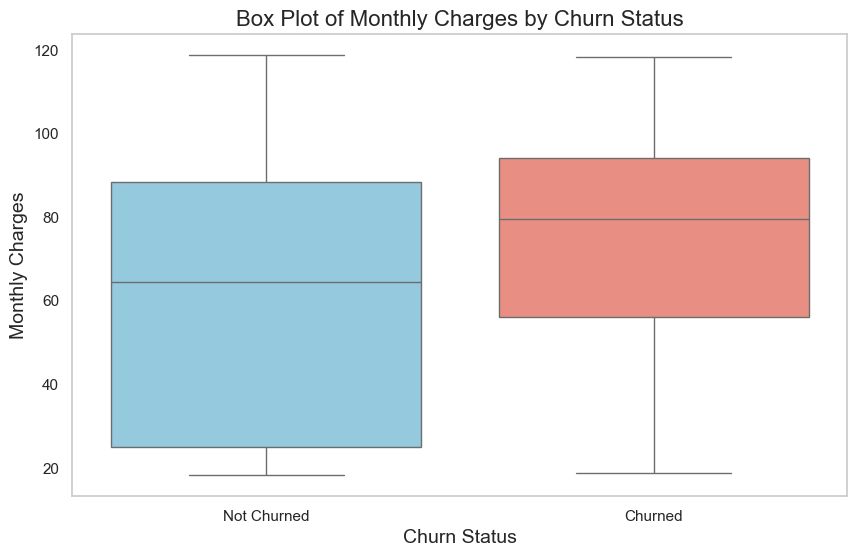

In [102]:
# Set the style for the plot
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Box plot for Monthly Charges by Churn status
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette={'No': 'skyblue', 'Yes': 'salmon'})

# Add titles and labels
plt.title('Box Plot of Monthly Charges by Churn Status', fontsize=16)
plt.xlabel('Churn Status', fontsize=14)
plt.ylabel('Monthly Charges', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned'])
plt.grid(axis='y')
plt.show()

- $H_0$ Average monthly charges of customers who churn <= Average monthly charges of customers who do not churn

- $H_a$ Average monthly charges of customers who churn > Average monthly charges of customers who do not churn

In [10]:
from scipy.stats import ttest_ind

# Separate the groups based on churn
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

alpha = 0.05

# Conduct 1-Tailed T Test
t, p = ttest_ind(churned['tenure'],not_churned['tenure'], equal_var=False)

# Compare t, p/2, alpha value and conclude hypothesis
if p/2 < alpha:
    print("We reject the hypothesis that average monthly charges of customers who churned <= average monthly charges of customers who do not churn")
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that average monthly charges of customers who churned <= average monthly charges of customers who do not churn


So yes, customers who churn have higher average monthly charges than those who don't

# Hypothesis 3: Does customers who churn has a shorter tenure on average than those who don't?

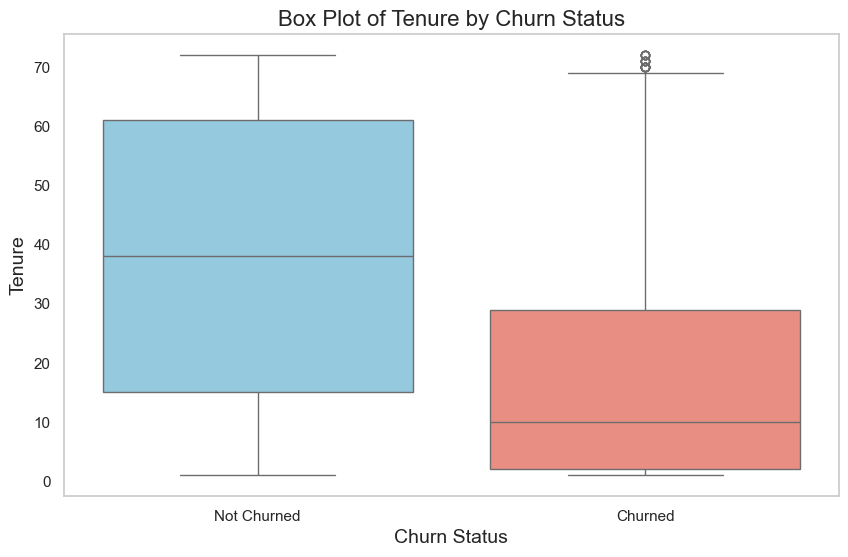

In [202]:
# Visualizing tenure distribution for customers who churn, not churn

# Set the style for the plot
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Box plot for Monthly Charges by Churn status
sns.boxplot(x = 'Churn', y = 'tenure', data = df, palette={'No': 'skyblue', 'Yes': 'salmon'})

# Add titles and labels
plt.title('Box Plot of Tenure by Churn Status', fontsize=16)
plt.xlabel('Churn Status', fontsize=14)
plt.ylabel('Tenure', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned'])
plt.grid(axis='y')
plt.show()


- $H_0$ Tenure of customers who churned >= Tenure of customers who do not churn
- $H_a$ Tenure of customers who churned < Tenure of customers who do not churn

In [9]:
# Conduct 1-Tailed T Test
t, p = ttest_ind(churned['tenure'],not_churned['tenure'], equal_var=False)

# Compare t, p/2, alpha value and conclude hypothesis
if p/2 < alpha:
    print("We reject the hypothesis that tenure of customers who churned >= tenure of customers who do not churn")
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that tenure of customers who churned >= tenure of customers who do not churn


- So yes, customers who churn have a shorter tenure on average than those who don't.

***

## 4 . Data Preprocessing 


In [39]:
# We can likely conver the no service to no overall
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [40]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')


In [41]:
df.replace('No internet service', 'No', inplace=True)


In [42]:
df.drop('gender',axis=1,inplace=True)


In [43]:
def replace_yes_no(df, columns):
    
    for col in columns:
        df[col] = df[col].replace({'Yes': 1, 'No': 0})

columns_to_replace = [
    "Partner", "Dependents", "PhoneService","MultipleLines", "OnlineSecurity", "OnlineBackup", 
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", 
    "PaperlessBilling", "Churn"
]

replace_yes_no(df, columns_to_replace)

df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [44]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
columns = ["Contract", "PaymentMethod", "InternetService"]

for column in columns:
    df[column] = labelencoder.fit_transform(df[column])
    
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [45]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [46]:
# Clean the TotalCharges column
df['TotalCharges'] = df['TotalCharges'].str.strip()  # Remove leading/trailing whitespace
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert to numeric

# Check for NaN values after conversion
if df['TotalCharges'].isnull().any():
    print('TotalCharges null values: ', df['TotalCharges'].isna().sum())
    print("Warning: NaN values found in 'TotalCharges' after conversion. They will be dropped.")
    df = df.dropna(subset=['TotalCharges'])  # Drop rows with NaN in TotalCharges


TotalCharges null values:  11


***

## 5. Predicting Churn

### Build Models

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

### Without Re-sampling the minority class

In [50]:
# Setting features and target
X = df.drop(columns=['Churn','customerID'])
y = df['Churn']

In [52]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(f'{model_name} Classification Report:\n{class_report}')
    
 
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Churn', 'Churn'])
    disp.plot(cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()


In [54]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train ,y_train)

LogisticRegression(max_iter=1000, random_state=42)


Logistic Regression Results:
Logistic Regression Accuracy: 0.79
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



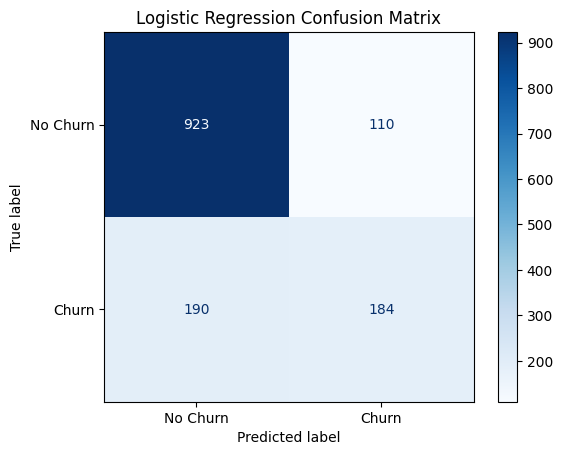

In [55]:
print("\nLogistic Regression Results:")
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")

- Ideally we balance imbalance dataset, so let's do that

### With Re-sampling the minority class

In [107]:
# Oversampling minority class
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [108]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

### 5.1 Logistic Regression

In [110]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train ,y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)


Logistic Regression Results:
Logistic Regression Accuracy: 0.82
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1037
           1       0.80      0.84      0.82      1029

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



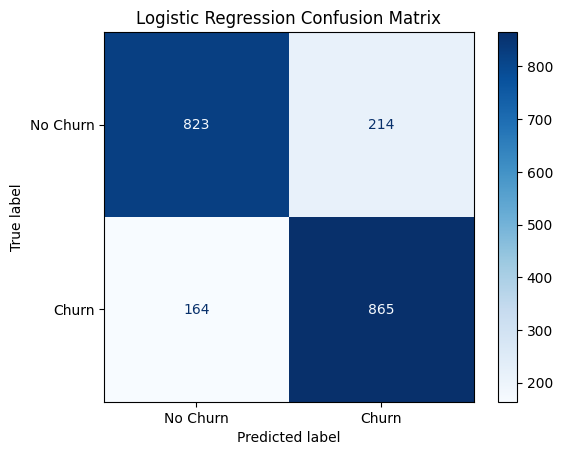

In [111]:
print("\nLogistic Regression Results:")
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")

### 5.2 Random Forest

In [28]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Random Forest Results:
Random Forest Accuracy: 0.83
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1037
           1       0.83      0.84      0.84      1029

    accuracy                           0.83      2066
   macro avg       0.84      0.83      0.83      2066
weighted avg       0.84      0.83      0.83      2066



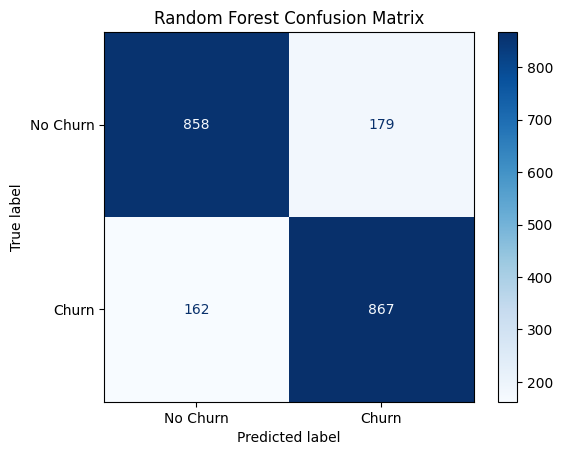

In [29]:
print("\nRandom Forest Results:")
evaluate_model(rf, X_test, y_test, "Random Forest")

### 5.3 XG Boost

In [30]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:14:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)


XGBoost Results:
XGBoost Accuracy: 0.83
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1037
           1       0.82      0.83      0.83      1029

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



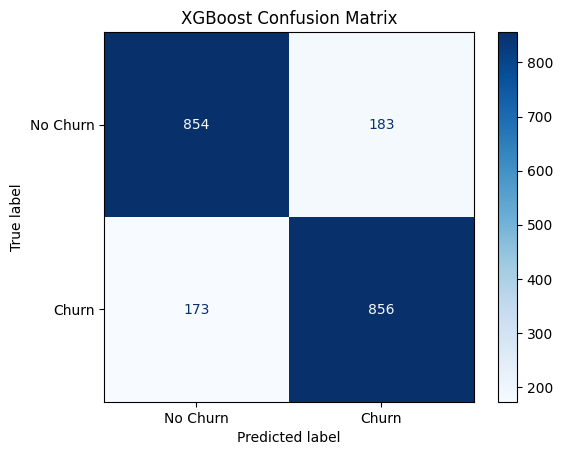

In [31]:
print("\nXGBoost Results:")
evaluate_model(xgb, X_test, y_test, "XGBoost")

### 5.4 CatBoost

In [46]:
catboost = CatBoostClassifier(verbose=0, random_state=42)
catboost.fit(X_train, y_train)


CatBoost Results:
CatBoost Accuracy: 0.84
CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1037
           1       0.83      0.85      0.84      1029

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



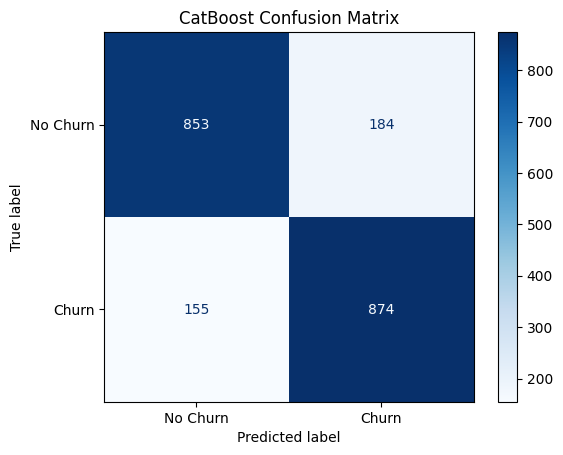

In [47]:
print("\nCatBoost Results:")
evaluate_model(catboost, X_test, y_test, "CatBoost")

- Cat Boost performs the best so we will take that and then look into refining our model

## 6. Tuning Model

### 6.1 Feature Importance Selection

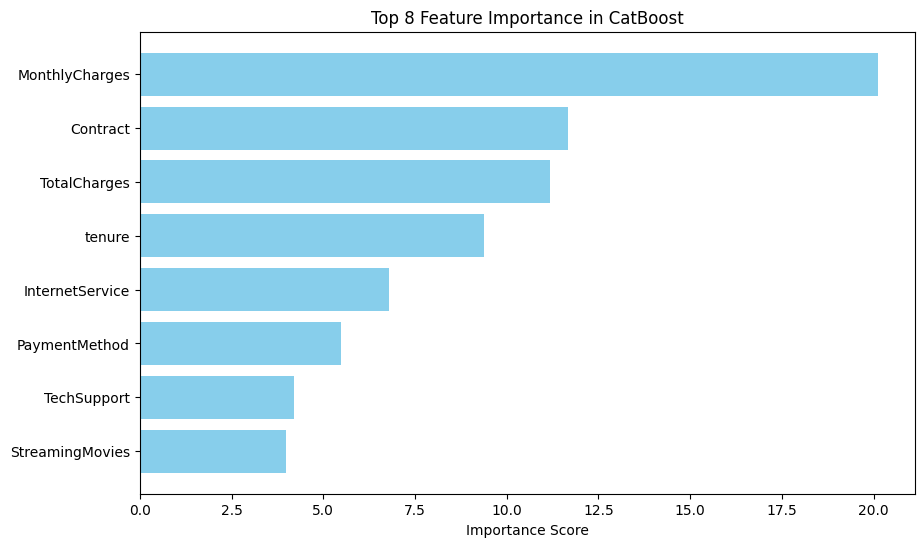

In [48]:
# Let's try to get top 8 features and see how the model performs 
from catboost import CatBoostClassifier, Pool

# Get feature importance
feature_importances = catboost.get_feature_importance(Pool(X_train, y_train), type='FeatureImportance')
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot top 8 features
top_8_features = feature_importance_df.head(8)
plt.figure(figsize=(10, 6))
plt.barh(top_8_features['Feature'], top_8_features['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Top 8 Feature Importance in CatBoost')
plt.gca().invert_yaxis()  # To show most important feature at top
plt.show()


In [49]:
# Use only top 8 features for training
X_train_top_8 = X_train[top_8_features['Feature']]
X_test_top_8 = X_test[top_8_features['Feature']]

# Retrain CatBoost with top 8 features
catboost.fit(X_train_top_8, y_train)


CatBoost Results Top 8 features:
CatBoost Accuracy: 0.82
CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1037
           1       0.79      0.86      0.83      1029

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



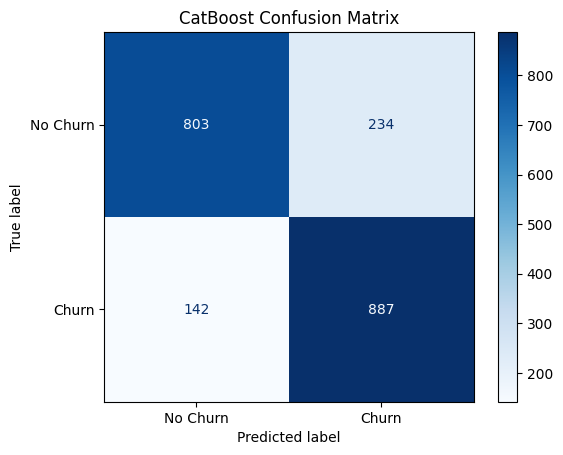

In [50]:
print("\nCatBoost Results Top 8 features:")
evaluate_model(catboost, X_test, y_test, "CatBoost")

- Looks as though all the features are needed and rightly so from our hypothesis that they all contribute to churn

### 6.2 Hyperparameter tuning

In [51]:
from sklearn.model_selection import RandomizedSearchCV

# Define CatBoostClassifier
cat_model = CatBoostClassifier(verbose=0, random_state=42)

# Define hyperparameter grid
param_dist = {
    'learning_rate': [0.01, 0.03, 0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7],
    'iterations': [100, 500, 1000]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(cat_model, param_distributions=param_dist, n_iter=10, scoring='f1', cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Get the best estimator
best_cat_model = random_search.best_estimator_


In [57]:
print("Best CatBoost model parameters:")
print(best_cat_model.get_params())

Best CatBoost model parameters:
{'verbose': 0, 'random_state': 42, 'learning_rate': 0.01, 'l2_leaf_reg': 1, 'iterations': 1000, 'depth': 10}



CatBoost Results Hypertuned:
CatBoost Accuracy: 0.84
CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1037
           1       0.83      0.85      0.84      1029

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



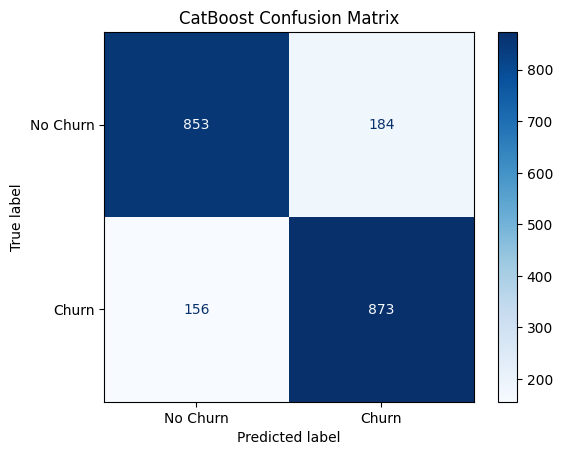

In [58]:
print("\nCatBoost Results Hypertuned:")
evaluate_model(best_cat_model, X_test, y_test, "CatBoost")

In [62]:
from catboost import cv, Pool

# Convert training data into CatBoost's Pool format
train_pool = Pool(X_train, label=y_train)

# Set CatBoost parameters
params = {     'loss_function': 'Logloss', 'verbose': 0, 'random_state': 42, 'learning_rate': 0.01, 'l2_leaf_reg': 1, 'iterations': 1000, 'depth': 10
}

# Perform cross-validation
cv_data = cv(pool=train_pool, params=params, fold_count=5, plot=True)

# Print the last row of the cross-validation results (best result)
print("Best cross-validated results:", cv_data.tail(1))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.3732239024
bestIteration = 997

Training on fold [1/5]

bestTest = 0.3569851894
bestIteration = 999

Training on fold [2/5]

bestTest = 0.3816213567
bestIteration = 990

Training on fold [3/5]

bestTest = 0.3602157664
bestIteration = 963

Training on fold [4/5]

bestTest = 0.3431126957
bestIteration = 993

Best cross-validated results:      iterations  test-Logloss-mean  test-Logloss-std  train-Logloss-mean  \
999         999           0.363097          0.014945            0.180399   

     train-Logloss-std  
999           0.001486  


In [64]:
params

{'loss_function': 'Logloss',
 'verbose': 0,
 'random_state': 42,
 'learning_rate': 0.01,
 'l2_leaf_reg': 1,
 'iterations': 1000,
 'depth': 10}

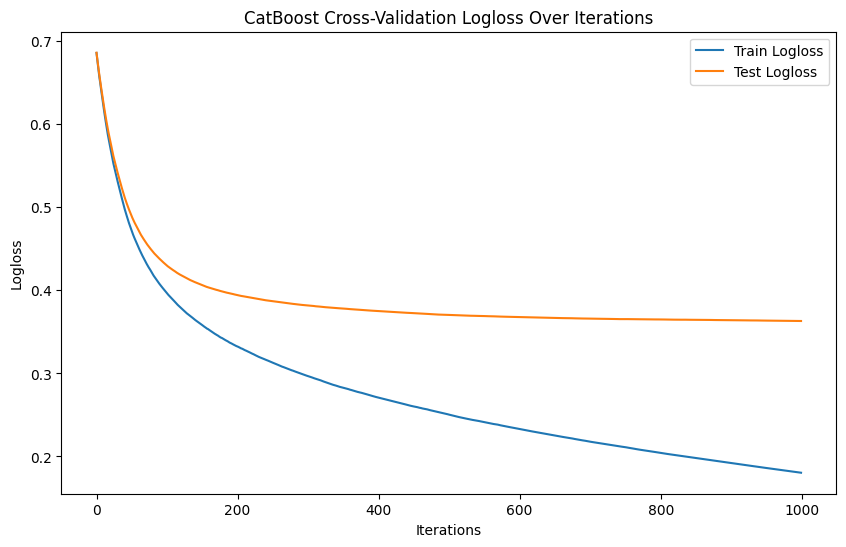

In [63]:
# Extracting training and validation scores (Logloss in this case)
train_logloss = cv_data['train-Logloss-mean']
test_logloss = cv_data['test-Logloss-mean']

# Plotting Logloss over iterations
plt.figure(figsize=(10, 6))
plt.plot(train_logloss, label='Train Logloss')
plt.plot(test_logloss, label='Test Logloss')
plt.xlabel('Iterations')
plt.ylabel('Logloss')
plt.title('CatBoost Cross-Validation Logloss Over Iterations')
plt.legend()
plt.show()

In [112]:
# Best parameters with best cv 
# Set the parameters for the CatBoost model
params = {
    'iterations': 1000,
    'learning_rate': 0.01,
    'depth': 10,
    'l2_leaf_reg': 1,
    'random_state': 42,
    'loss_function': 'Logloss',
    'verbose': 0
}

# Initialize the CatBoostClassifier with the parameters
best_cat_model_cv = CatBoostClassifier(**params)

# Fit the model on the training data
best_cat_model_cv.fit(X_train, y_train)



CatBoost Results Hypertuned:
CatBoost Accuracy: 0.84
CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1037
           1       0.83      0.85      0.84      1029

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



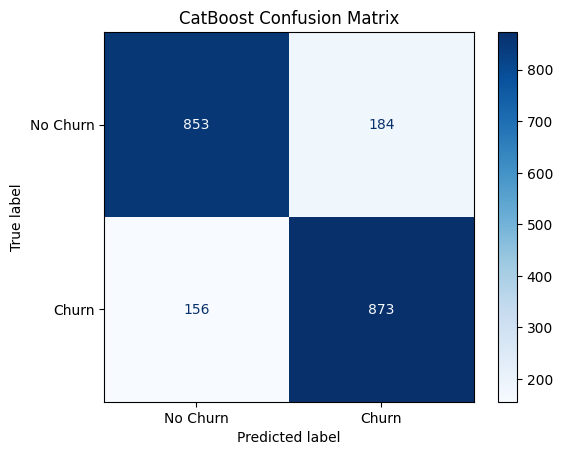

In [113]:
print("\nCatBoost Results Hypertuned:")
evaluate_model(best_cat_model_cv, X_test, y_test, "CatBoost")

The Top models is Cat Boost Classifier. All models are evaluated based on **F1** score.

In [115]:
df

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,84.80,1990.50,0
7039,2234-XADUH,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,7362.90,0
7040,4801-JZAZL,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,8361-LTMKD,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [119]:
# Saving the churn predictions 

# Load your saved model
best_cat_model_cv.save_model("best_cat_model.cbm")


# Split the data, keeping customer IDs
X_train, X_test, y_train, y_test, customer_id_train, customer_id_test = train_test_split(
    X, y, df['customerID'], test_size=0.2, random_state=42
)

# Make predictions on the test data
y_pred_proba = best_cat_model_cv.predict_proba(X_test)[:, 1]  # Probability of class 'Churn' (1)
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions

# Create a DataFrame for the predictions using the kept customer IDs
predictions_df = pd.DataFrame({
    'CustomerID': customer_id_test,
    'Predictions': ['Yes' if pred == 1 else 'No' for pred in y_pred],
    'Churn Probability': y_pred_proba
})

# Save the predictions to a CSV file
predictions_df.to_csv("churn_predictions.csv", index=False)

print("Predictions saved to churn_predictions.csv")


Predictions saved to churn_predictions.csv


#### [churn_preditction](churn_predictions.csv)

#### We can expect this model to perform with 84% accuracy(F1 Score 0.84) in the future on data it has not seen, given no major changes in our data source.

***

# Conclusion

## Summary:

▪️ The top drivers of churn are:

### Payment Method: Electronic Check

Observation: Customers using the electronic check payment method have a higher churn rate compared to other payment methods.

Insight: This may indicate dissatisfaction with the electronic payment process or issues related to payment reliability.

### Contract Type: Month-to-Month

Observation: Customers with a month-to-month contract exhibit a significantly higher churn rate.

Insight: Short-term contracts may suggest a lack of commitment or loyalty from customers, making them more prone to churn.

### Internet Service: Fiber Optic

Observation: Customers who use fiber optic internet service show a higher churn rate than those with other internet service types.

Insight: This could indicate issues with service delivery, pricing, or competition within the market for fiber optic services.

### Tech Support: No Tech Support

Observation: Customers who do not use tech support have a higher churn rate.

Insight: This may indicate that customers who require assistance or have technical issues are not receiving the support they need, prompting them to leave.

### Device Protection: No Device Protection

Observation: Customers without device protection services exhibit higher churn rates.

Insight: This could reflect customers' perceptions of the value of such services or dissatisfaction with coverage, leading them to discontinue their subscriptions.

### Online Security: No Online Security

Observation: Customers without online security services have a higher churn rate.

Insight: This suggests that customers who feel unprotected online may be more likely to leave, indicating a potential area for improving service offerings.

    
▪️ Average **monthly charges** is higher for customers who churn
 
▪️ Average **tenure** is shorter for customers who churn
 
▪️ Additional services (device protection, online security, online backup, tech support, streaming tv, streaming movies) are dependent on churn

▪️ The meachine learning model: logistic regression classifier is expected to predict churn with **84% accuracy** **F1 score 0.84** on future unseen data

### Recommendations for reducing Churn:

#### 1. Identify At-Risk Customers Using Churn Prediction

Action: Utilize your churn prediction model to score the entire customer base and identify those at high risk of churn based on predictive probabilities.

Implementation: Segment customers into risk categories (low, medium, high) to tailor retention efforts.

#### 2. Address Key Drivers of Churn

- Payment Method: Electronic Check

Observation: Customers using electronic checks show a higher churn rate.

Recommendation: Investigate issues with the electronic payment process, and consider offering alternative payment methods or incentives for those switching to more reliable payment options.

- Contract Type: Month-to-Month

Observation: Month-to-month contracts correlate with higher churn rates.

Recommendation: Promote longer-term contracts through attractive discounts or benefits to enhance customer commitment and reduce churn likelihood.
- Internet Service: Fiber Optic

Observation: Customers using fiber optic internet services exhibit higher churn.

Recommendation: Enhance service reliability and address any performance issues. Consider bundling fiber optic services with additional perks (e.g., discounts on related services).

- Tech Support: No Tech Support

Observation: A lack of tech support correlates with higher churn.

Recommendation: Enhance customer support by offering dedicated tech support packages or proactive outreach to customers who haven’t utilized support services.

- Device Protection: No Device Protection

Observation: Higher churn rates among customers without device protection.

Recommendation: Communicate the value of device protection services through targeted campaigns, possibly offering limited-time promotions to entice sign-ups.

- Online Security: No Online Security

Observation: Customers without online security services are more likely to churn.

Recommendation: Educate customers on the importance of online security and offer promotional rates for those who sign up for security services.

#### 3. Implement Targeted Retention Campaigns

Action: Develop and execute tailored campaigns for at-risk customers, focusing on the insights derived from churn drivers.

Implementation:
Personalized Offers: Create customized offers based on specific churn drivers (e.g., discounts for customers using electronic checks or incentives for those switching to longer contracts).
Dedicated Outreach: Conduct targeted communications, emphasizing the improvements made in service reliability, tech support, and online security.

#### 4. Leverage Customer Insights for Engagement

Action: Use customer feedback to understand their needs and concerns, particularly regarding the identified churn drivers.

Implementation:
Feedback Mechanisms: Regularly solicit feedback from customers regarding their payment methods and service experiences.
Engagement Programs: Implement educational programs that enhance customers' understanding of the services they use and how to maximize their benefits.

#### 5. Monitor Engagement and Satisfaction

Action: Regularly track customer engagement and satisfaction levels, especially after targeted retention efforts.

Implementation:
Pulse Surveys: Conduct surveys focused on customers’ satisfaction with payment methods and service offerings.
Engagement Metrics: Analyze metrics to determine if retention strategies lead to increased engagement and reduced churn.

#### 6. Utilize Predictive Analytics for Proactive Adjustments

Action: Continuously update the churn prediction model and adjust strategies based on new insights and customer data.

Implementation:
Model Retraining: Regularly retrain the churn prediction model with the latest data for improved accuracy.
Outcome Tracking: Monitor churn rates before and after implementing retention strategies to evaluate effectiveness.

#### 7. Foster Cross-Functional Collaboration

Action: Encourage collaboration across departments to share insights and improve retention strategies.
Implementation:
Unified Approach: Ensure that marketing, sales, and customer service teams work together to create a cohesive retention strategy based on shared data insights.

Text(0.5, 1.0, 'Predicted Revenue Distribution')

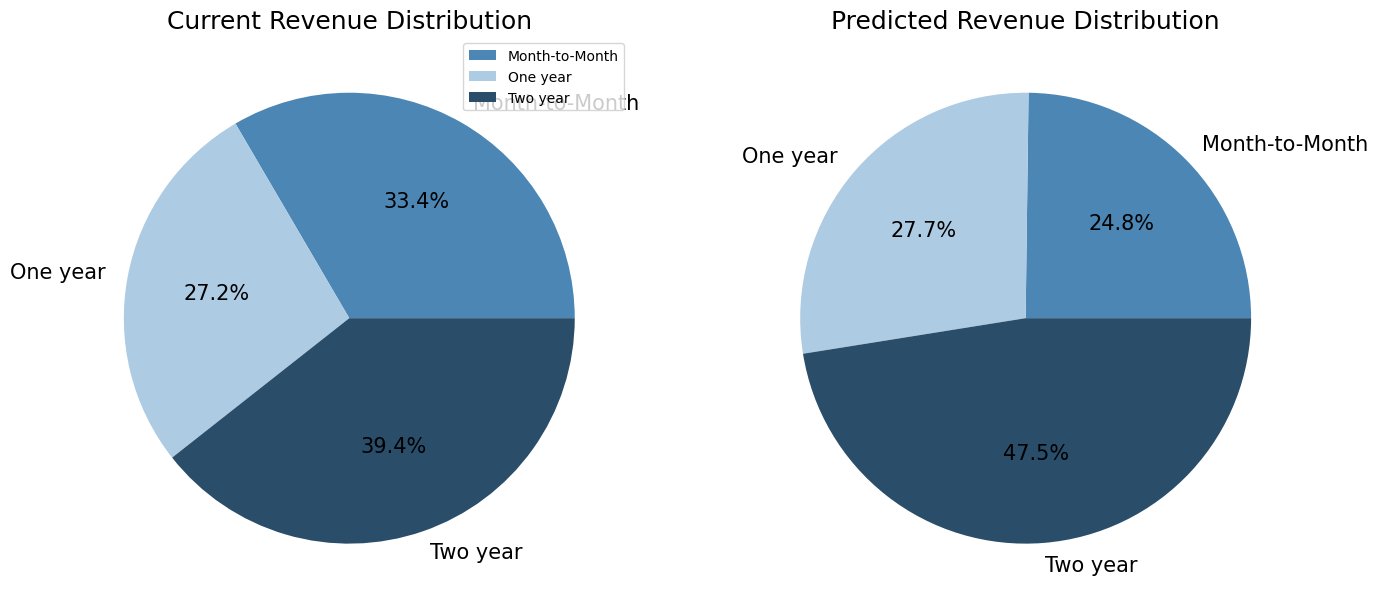

In [121]:

# Visualizing the current revenue and predicted revenue if recommendations are put to action

monthly = 3443414.75
one_year = 2800852.70
two_year = 4057673.60
monthly_pred = 0.8 * monthly
one_year_pred = 1.1 * one_year
two_year_pred = 1.3 * two_year
plt.figure(figsize=(16,12))


plt.subplot(121)
y = np.array([monthly, one_year, two_year])
mylabels = ["Month-to-Month", "One year",'Two year']
myexplode = [0, 0, 0]
mycolors = ['#4b86b4','#adcbe3','#2a4d69']
textprops = {"fontsize":15}
plt.pie(y, labels = mylabels, explode = myexplode, colors = mycolors, textprops=textprops, autopct='%.1f%%')
plt.legend()
plt.title('Current Revenue Distribution',fontsize=18)


plt.subplot(122)
y_pred = np.array([monthly_pred, one_year_pred, two_year_pred])
mylabels = ["Month-to-Month", "One year",'Two year']
myexplode = [0, 0, 0]
mycolors = ['#4b86b4','#adcbe3','#2a4d69']
textprops = {"fontsize":15}
plt.pie(y_pred, labels = mylabels, explode = myexplode, colors = mycolors, textprops=textprops, autopct='%.1f%%')
plt.title('Predicted Revenue Distribution',fontsize=18)

### Next Steps:

▪️ Collect more data on customers' **demographic information** (eg. place of residence, socio-economic data such as occupation, household income.)

▪️ Develop machine learning models with higher accuracy with these additonal data and more accurate features.

▪️ Conduct **price discrimination analysis** to further determine the price point for each contract type and service.

## Conclusion
By combining the insights from the analysis of churn drivers with proactive retention strategies informed by churn prediction, you can effectively address the underlying issues leading to customer churn. This comprehensive approach will enhance customer satisfaction, loyalty, and ultimately lead to improved business outcomes.